# Imports & Setup

In [45]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../../src"))

from wordcloud import WordCloud
from preprocessor import TextPreprocessor
from sentiment_analyzer import SentimentAnalyzer
from keyword_extractor import KeywordExtractor
from theme_classifier import ThemeClassifier

In [46]:
class ReviewPipeline:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.preprocessor = TextPreprocessor()
        self.sentiment_model = SentimentAnalyzer()
        self.extractor = KeywordExtractor(max_features=200)
        self.classifier = ThemeClassifier()

    def load_data(self):
        self.df = pd.read_csv(self.data_path)

    def preprocess_text(self):
        self.df["cleaned_review"] = self.df["review"].astype(str).apply(self.preprocessor.preprocess)

    def analyze_sentiments(self):
        self.df[["sentiment_label", "sentiment_score"]] = self.df["review"].apply(
            lambda x: pd.Series(self.sentiment_model.analyze(x))
        )

    def extract_keywords(self):
        return self.extractor.extract_keywords(self.df["cleaned_review"])

    def classify_themes(self):
        self.df["themes"] = self.df["cleaned_review"].apply(self.classifier.classify)

    def get_data(self):
        return self.df


#### handled by the pipeline class:

In [47]:
pipeline = ReviewPipeline("../../data/dashin.csv")
pipeline.load_data()
pipeline.preprocess_text()
pipeline.analyze_sentiments()
pipeline.classify_themes()
keywords = pipeline.extract_keywords()

data = pipeline.get_data()  # get the processed DataFrame

In [48]:
df = data[data['bank'] =='Dashen Bank']
df.head()

,review,rating,date,bank,source,cleaned_review,sentiment_label,sentiment_score,themes
0,መቸሸጠ,5,6/3/2025,Dashen Bank,Google Play Store,,neutral,0.0000,[Other]
1,gadaa,5,6/1/2025,Dashen Bank,Google Play Store,gadaa,neutral,0.0000,[Other]
2,Massive upgrade from the Amole app.,5,5/31/2025,Dashen Bank,Google Play Store,massive upgrade amole app,neutral,0.0000,[UI/UX]
3,very good for this app,5,5/31/2025,Dashen Bank,Google Play Store,good app,positive,0.4927,[UI/UX]
4,top,5,5/31/2025,Dashen Bank,Google Play Store,top,positive,0.2023,[Other]


# ----------------- Sentiment Analysis -----------------

# Sentiment Counts

In [49]:
sentiment_counts = df["sentiment_label"].value_counts()
print("Sentiment\n", sentiment_counts)

Sentiment
 sentiment_label
positive    266
neutral      89
negative     24
Name: count, dtype: int64


# Count Plot

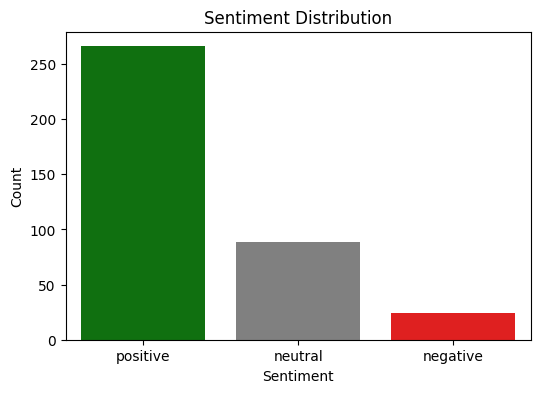

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x="sentiment_label",
    hue="sentiment_label",
    order=["positive", "neutral", "negative"],
    palette={"positive": "green", "neutral": "gray", "negative": "red"},
    legend=False
)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordClouds per Sentiment

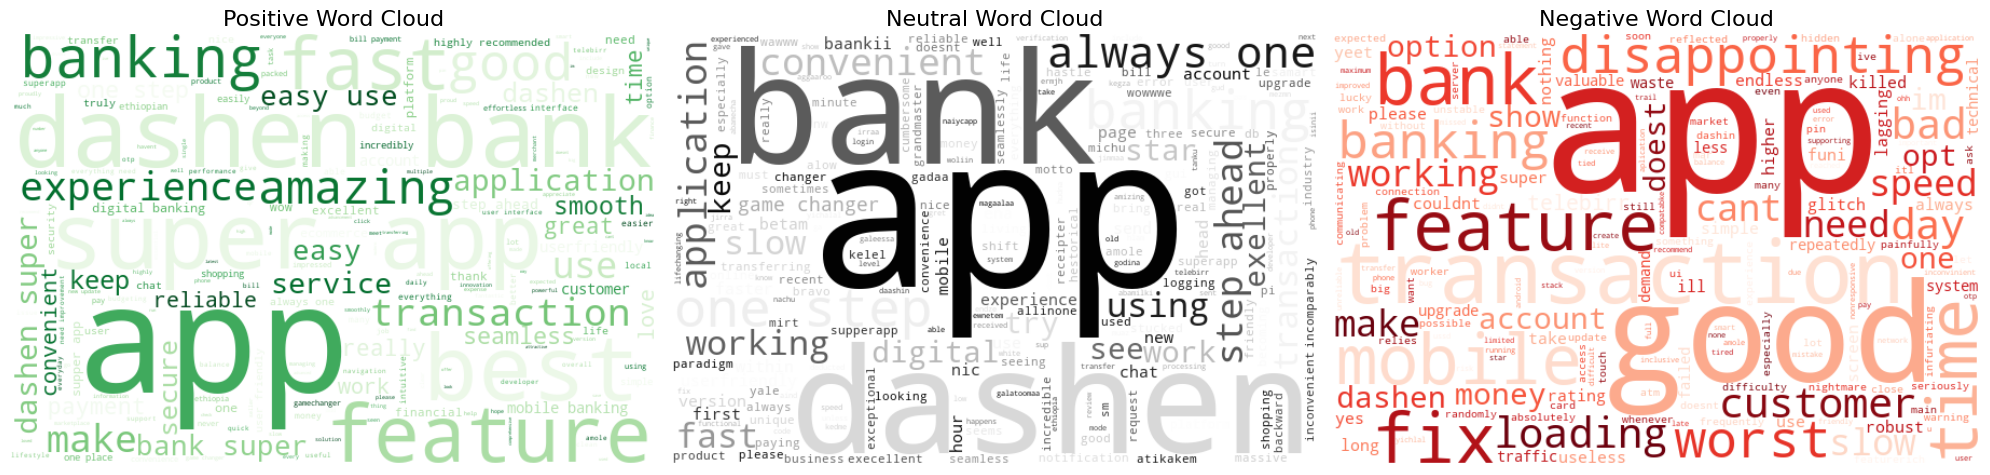

In [51]:
sentiments = ["positive", "neutral", "negative"]
colors = ["Greens", "Greys", "Reds"]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, sentiment in enumerate(sentiments):
    text = " ".join(df[df["sentiment_label"] == sentiment]["cleaned_review"].dropna().astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color="white", colormap=colors[idx]).generate(text)
    axes[idx].imshow(wordcloud, interpolation="bilinear")
    axes[idx].axis("off")
    axes[idx].set_title(f"{sentiment.capitalize()} Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

# Sample Reviews by Sentiment

In [52]:
for sentiment in sentiments:
    print(f"\nSample {sentiment} reviews:")
    sample_reviews = df[df["sentiment_label"] == sentiment]["cleaned_review"].head(5)
    for i, review in enumerate(sample_reviews, start=1):
        print(f"{i}. {review}")


Sample positive reviews:
1. good app
2. top
3. app better amole biometric new update doesnt work
4. wow saff app
5. nice application

Sample neutral reviews:
1. 
2. gadaa
3. massive upgrade amole app
4. slow
5. 

Sample negative reviews:
1. useless app ever loading take long
2. simple robust feature yes please endless loading screen killed funi couldnt use day fix glitch ill yeet higher rating
3. good mobile bank app
4. always lagging
5. bad


# -- Sentiment score Distribution By User Rating --

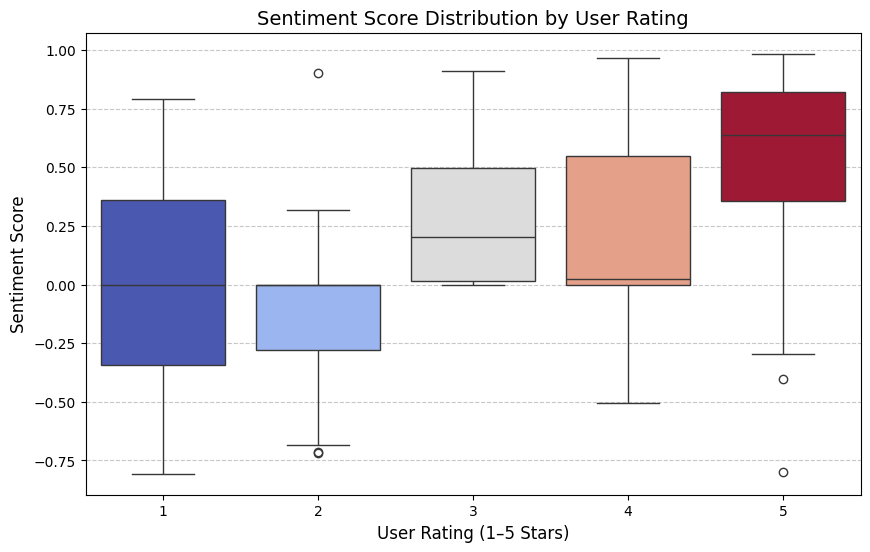

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="rating",
    y="sentiment_score",
    hue="rating",
    palette="coolwarm",
    legend=False
)
plt.title("Sentiment Score Distribution by User Rating", fontsize=14)
plt.xlabel("User Rating (1–5 Stars)", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Keywords from Pipeline

In [54]:
print("Top Keywords:", keywords)

Top Keywords: ['able' 'account' 'ahead' 'allinone' 'also' 'always' 'always one'
 'amazing' 'amazing app' 'amole' 'app' 'app easy' 'app ever'
 'app gamechanger' 'app keep' 'app make' 'app secure' 'application' 'apps'
 'balance' 'bank' 'bank always' 'bank super' 'banking' 'banking app'
 'best' 'best app' 'better' 'beyond' 'bill' 'bill payment' 'budget'
 'budgeting' 'cant' 'changer' 'chat' 'chat banking' 'clean' 'clear'
 'click' 'convenience' 'convenient' 'customer' 'daily' 'dashen'
 'dashen bank' 'dashen super' 'dashen supper' 'delivers' 'design'
 'developer' 'digital' 'digital banking' 'digital platform'
 'disappointing' 'doesnt' 'done' 'easier' 'easily' 'easy' 'easy use'
 'ecommerce' 'effortless' 'ethiopia' 'ethiopian' 'even' 'ever' 'everyday'
 'everything' 'everything need' 'excellent' 'expected' 'experience' 'fast'
 'fast secure' 'feature' 'financial' 'fix' 'friendly' 'game'
 'game changer' 'gamechanger' 'get' 'give' 'go' 'good' 'good app' 'great'
 'havent' 'head' 'help' 'highly' 'hi

# ---------------- Theme Classification --------------

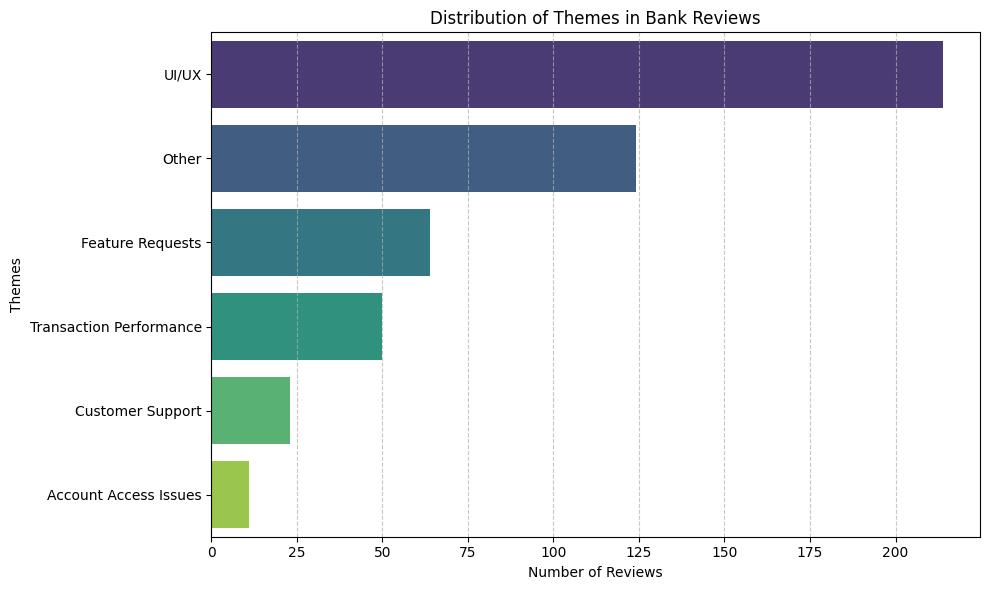

In [55]:
if "themes" in df.columns:
    theme_counts = df["themes"].explode().value_counts().reset_index()
    theme_counts.columns = ["theme", "count"]

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=theme_counts,
        x="count",
        y="theme",
        hue="theme",
        palette="viridis",
        dodge=False,
        legend=False
    )
    plt.title("Distribution of Themes in Bank Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Themes")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'themes' not found in the DataFrame.")